<a href="https://colab.research.google.com/github/ADRIANVM117/data-science-portfolio/blob/main/GE_STOCK_STATS_AND_PREDICTIVE_MODEL/GE_MOVIMIENTO_BROWNIANNO_GEOMETRICO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
import pandas as pd

In [13]:
df_final = pd.read_csv('/content/drive/MyDrive/df_final.csv')
df_final.set_index('Unnamed: 0', inplace=True)
df_final

,Open,High,Low,Close,Volume,SMA,EMA,SMA_vs_EMA,TR,ATR,...,14 Low,%K,Momentum,Typical Price,CCI,EMA12,EMA26,MACD,MACD Signal,Volume Average
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2025-01-06 08:30:00,172.56,173.200,171.96,173.2000,40423.0,172.9510,172.764180,0.186820,1.240,0.830764,...,171.18,80.800000,0.004145,172.786667,49.159138,172.748972,172.690820,0.058152,0.033490,226649.785714
2025-01-06 09:00:00,173.15,173.200,171.94,172.1400,5265.0,172.9360,172.667331,0.268669,1.260,0.780407,...,171.18,38.400000,-0.004914,172.426667,-46.985711,172.666967,172.650086,0.016882,0.027324,281875.571429
2025-01-06 09:30:00,173.15,173.150,171.18,172.5300,518129.0,172.9090,172.784515,0.124485,1.970,0.880407,...,171.00,57.089552,-0.001389,172.286667,-89.533333,172.762780,172.690892,0.071887,0.029935,418405.714286
2025-01-06 10:00:00,172.52,173.680,172.38,173.6800,374817.0,172.9970,172.841074,0.155926,1.300,0.879693,...,171.00,100.000000,0.007483,173.246667,183.150750,172.805103,172.703764,0.101339,0.019447,399894.214286
2025-01-06 10:30:00,173.62,173.680,172.69,172.7350,245625.0,173.0225,172.654646,0.367854,0.990,0.876121,...,171.00,64.738806,-0.001301,173.035000,169.587738,172.646031,172.625665,0.020366,-0.001026,373126.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-04 14:30:00,202.30,202.785,201.87,202.1186,326436.0,201.6789,201.601425,0.077475,0.915,0.000000,...,0.00,0.000000,0.000000,202.257867,0.000000,201.564958,201.447820,0.117138,0.042760,0.000000
2025-02-04 15:00:00,202.03,202.070,201.30,201.5797,296004.0,201.5848,201.486497,0.098303,0.770,0.000000,...,0.00,0.000000,0.000000,201.649900,0.000000,201.464296,201.394158,0.070139,0.024166,0.000000
2025-02-04 15:30:00,201.55,202.360,201.36,202.1300,826532.0,201.6628,201.465785,0.197015,1.000,0.000000,...,0.00,0.000000,0.000000,201.950000,0.000000,201.443314,201.379314,0.063999,0.012672,0.000000


#Movimiento Browniano Geometrico

## Calcular el drift y volatilidad

In [14]:
import numpy as np

# Extraer precios de cierre del DataFrame
close_prices = df_final["Close"].values

# Calcular rendimientos logarítmicos
log_returns = np.log(close_prices[1:] / close_prices[:-1])

# Calcular parámetros del MGB
mu = np.mean(log_returns)  # Rendimiento medio
sigma = np.std(log_returns, ddof=1)  # Volatilidad (desviación estándar)

print(f"Drift (mu): {mu:.6f}")
print(f"Volatilidad (sigma): {sigma:.6f}")


Drift (mu): 0.000218
Volatilidad (sigma): 0.008266


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


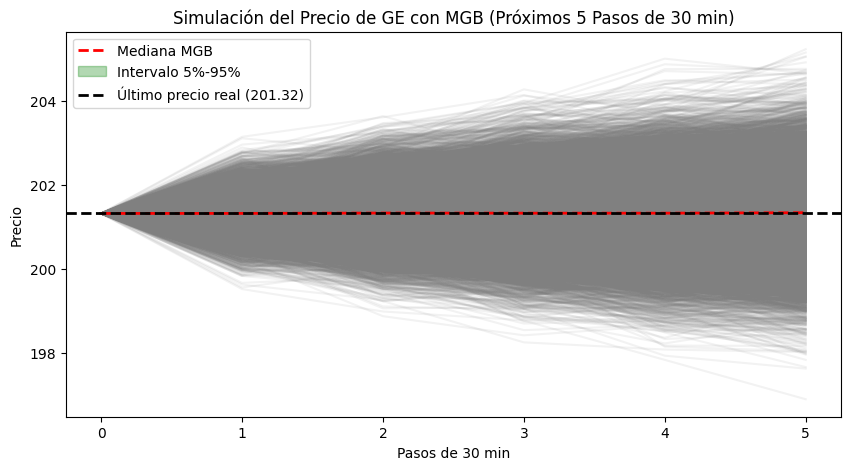

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 📌 1. Parámetros del MGB
S0 = df_final['Close'].iloc[-1]  # Último precio real
mu = 0.000218  # Drift
sigma = 0.008266  # Volatilidad
T = 5  # Pasos de 30 minutos
dt = 30 / 390  # 30 minutos como fracción del tiempo de trading (6.5 horas)
N_sim = 10000  # Número de simulaciones

# 📌 2. Generar trayectorias del MGB
S = np.zeros((N_sim, T+1))
S[:, 0] = S0  # Todas las simulaciones comienzan en el último precio real

np.random.seed(42)  # Para reproducibilidad
for t in range(1, T+1):
    Z = np.random.normal(0, 1, N_sim)  # Generar ruido gaussiano
    S[:, t] = S[:, t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

# 📌 3. Obtener percentiles para el intervalo de confianza
percentile_5 = np.percentile(S, 5, axis=0)
percentile_95 = np.percentile(S, 95, axis=0)
median_S = np.median(S, axis=0)

# 📌 4. Graficar las trayectorias del MGB con colores diferenciados
plt.figure(figsize=(10,5))

# Graficar trayectorias individuales con líneas más tenues
for i in range(N_sim):
    plt.plot(range(T+1), S[i], color="gray", alpha=0.1)

# Graficar la mediana con una línea roja más gruesa
plt.plot(range(T+1), median_S, color="red", linestyle="dashed", linewidth=2, label="Mediana MGB")

# Graficar el intervalo de confianza en verde
plt.fill_between(range(T+1), percentile_5, percentile_95, color="green", alpha=0.3, label="Intervalo 5%-95%")

# Último precio real en negro
plt.axhline(S0, color="black", linestyle="--", linewidth=2, label=f"Último precio real ({S0:.2f})")

plt.xlabel("Pasos de 30 min")
plt.ylabel("Precio")
plt.title("Simulación del Precio de GE con MGB (Próximos 5 Pasos de 30 min)")
plt.legend()
plt.show()


In [16]:
import numpy as np
import pandas as pd

# Suponemos que "simulaciones" es un array de tamaño (num_simulaciones, num_pasos)
# Donde cada fila es una simulación y cada columna representa el precio en un paso de 30 min

num_pasos = 5  # 5 pasos de 30 min
num_simulaciones = 1000  # Ejemplo de 1000 simulaciones

# Simulaciones de ejemplo (sustituir con las reales)
simulaciones = np.random.normal(201.32, 1, (num_simulaciones, num_pasos))

# Calcular la mediana (percentil 50) en cada paso
mediana_mgb = np.percentile(simulaciones, 50, axis=0)

# Calcular percentiles 5% y 95% (Intervalo de Confianza)
percentil_5 = np.percentile(simulaciones, 5, axis=0)
percentil_95 = np.percentile(simulaciones, 95, axis=0)

# Crear DataFrame para visualizar los valores
df_predicciones = pd.DataFrame({
    "Paso": np.arange(1, num_pasos + 1),
    "Mediana": mediana_mgb,
    "Percentil_5": percentil_5,
    "Percentil_95": percentil_95
})

df_predicciones.set_index('Paso', inplace=True)


df_predicciones

,Mediana,Percentil_5,Percentil_95
Paso,,,
1,201.417183,199.694552,203.037688
2,201.257020,199.575429,202.841736
3,201.277817,199.709321,202.973336
4,201.401871,199.642457,202.934231
5,201.397634,199.708871,203.087368
